<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/07-Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Perceptrón
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos un perceptrón para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [30]:
# Paquetes necesarios
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

---
## <font color='264CC7'> Clasificación </font>

Se usará el conjunto de datos de dígitos de MNIST.

In [7]:
# Cargamos el dataset MNIST
X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

In [8]:
#Convertir en DataFrame
X = pd.DataFrame(X)
y = pd.Series(y)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Forma de X: (70000, 784)
Forma de y: (70000,)



### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

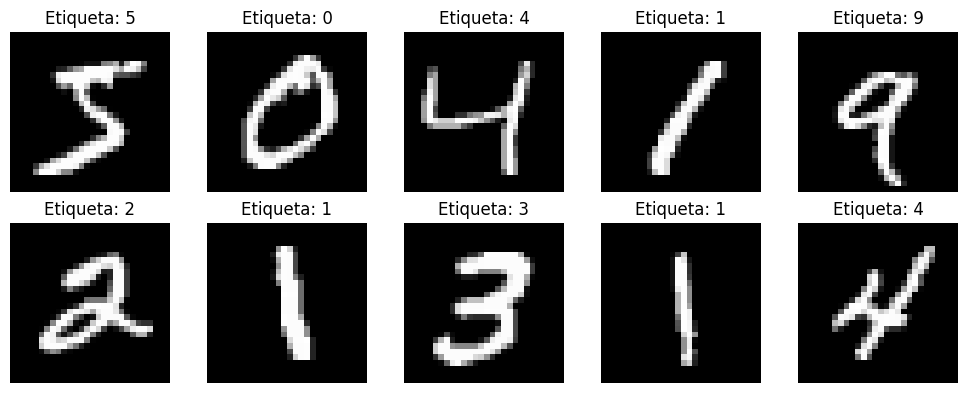

In [9]:
# Mostrar algunos datos
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28), cmap='gray')
    plt.title(f"Etiqueta: {y.iloc[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
# Descripción
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [11]:
y.value_counts().sort_index()

,count
class,
0,6903
1,7877
2,6990
3,7141
4,6824
5,6313
6,6876
7,7293
8,6825


In [12]:
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Media (primeros 5 pixeles):", X_scaled.mean(axis=0)[:5])
print("Std (primeros 5 pixeles):", X_scaled.std(axis=0)[:5])

Media (primeros 5 pixeles): [0. 0. 0. 0. 0.]
Std (primeros 5 pixeles): [0. 0. 0. 0. 0.]



### <font color='264CC7'> Determinación de la red </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina una red neuronal para clasificar los datos:
<ul>
  <li>Define la red.</li>
  <li>Compila la red.</li>
  <li>Presenta un resumen de la red.</li>
</ul>
</div>


In [15]:
# Fijar semilla para reproducibilidad
import random, os
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.config.experimental.enable_op_determinism()
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
    os.environ["TF_DETERMINISTIC_OPS"] = "1"

set_seed(49)

In [18]:
# Definimos el modelo
model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

In [20]:
# Compilamos el modelo
optimizer = SGD(learning_rate=0.1)
loss = CategoricalCrossentropy()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

La red neuronal definida es un perceptrón multicapa compuesto por tres capas densas. La primera capa oculta tiene 128 neuronas y recibe como entrada los 784 píxeles de cada imagen (28x28). La segunda capa oculta tiene 64 neuronas. Ambas utilizan la función de activación tanh, lo que permite modelar relaciones no lineales en los datos.

La capa de salida está formada por 10 neuronas con activación softmax, una por cada dígito (0-9), produciendo probabilidades de pertenencia a cada clase.

El modelo posee un total de 109 386 parámetros entrenables, los cuales serán ajustados durante el proceso de entrenamiento para minimizar la función de pérdida y mejorar la capacidad de clasificación.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [24]:
# One-hot encoding
y_one_hot = to_categorical(y.astype(int), num_classes=10)

# División train / test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_one_hot,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (56000, 784) (56000, 10)
Test: (14000, 784) (14000, 10)


Epoch 1/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8400 - loss: 0.5540
Epoch 2/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9417 - loss: 0.2056
Epoch 3/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9580 - loss: 0.1526
Epoch 4/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9671 - loss: 0.1202
Epoch 5/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9739 - loss: 0.0974
Epoch 6/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9793 - loss: 0.0800
Epoch 7/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9836 - loss: 0.0662
Epoch 8/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9869 - loss: 0.0551
Epoch 9/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9898 - loss: 0.0460
Epoch 10/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9920 - loss: 0.0385
Epoch 11/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9940 - loss: 0.0324
Epoch 12/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

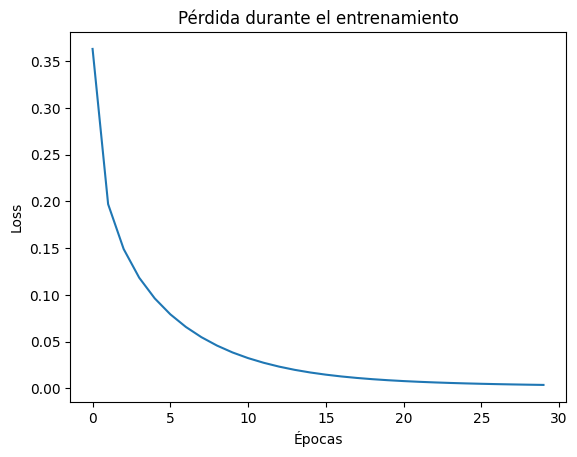

In [25]:
# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=128,
    verbose=1
)

# Visualizar la pérdida
plt.plot(history.history['loss'])
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.title("Pérdida durante el entrenamiento")
plt.show()


In [26]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss en test:", loss)
print("Accuracy en test:", accuracy)


Loss en test: 0.1458207219839096
Accuracy en test: 0.9649999737739563


In [27]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [31]:
# Matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("\nMatriz de confusión:\n", cm)

# Reporte de clasificación
print("\nReporte de clasificación:\n")
print(classification_report(y_test_classes, y_pred_classes))


Matriz de confusión:
 [[1366    0    2    1    2    5    3    0    1    1]
 [   0 1548    7    4    1    5    0    7    2    1]
 [   9    4 1342   11    7    3    6    6    9    1]
 [   3    2   16 1361    2   16    1   11   13    3]
 [   3    1    3    1 1320    2    6    4    3   22]
 [   5    1    3   12    5 1200   12    4   13    8]
 [  11    1    6    0    7    6 1338    0    6    0]
 [   3    4   10    4    9    1    1 1415    0   12]
 [   7    5    5   13    2   12   10    3 1302    6]
 [   7    6    3   10   13    3    0   19   12 1318]]

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           1       0.98      0.98      0.98      1575
           2       0.96      0.96      0.96      1398
           3       0.96      0.95      0.96      1428
           4       0.96      0.97      0.97      1365
           5       0.96      0.95      0.95      1263
           6       0.97      0.97      

El modelo fue entrenado durante 30 épocas, mostrando una convergencia rápida y estable. La precisión en entrenamiento aumentó progresivamente hasta alcanzar valores cercanos al 100%, mientras que la función de pérdida disminuyó de forma consistente, indicando un adecuado proceso de aprendizaje.

Al evaluar el modelo con el conjunto de prueba, se obtuvo una pérdida de 0.146 y una exactitud del 96.5%, lo que evidencia una alta capacidad de generalización. La matriz de confusión muestra que la mayoría de los dígitos fueron clasificados correctamente, con errores principalmente entre clases visualmente similares. El reporte de clasificación confirma un desempeño equilibrado entre clases, con valores de precisión, recall y F1-score cercanos a 0.96 para todos los dígitos. En conjunto, estos resultados indican que la red neuronal definida es efectiva para la tarea de reconocimiento de dígitos manuscritos.